In [1]:
# Import Libraries
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8) #Adjust the configeration of plots we will create





In [2]:
# Read in the data
movie_data = pd.read_csv("E:\Python project\movies.csv")
movie_data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


<font color=green>null percentage</font>

In [3]:
# Let's see if there is any missing data
for col in movie_data.columns:
     perecentage_missing = np.mean(movie_data[col].isnull())
     print('{}-{}%'.format(col,perecentage_missing * 100))

name-0.0%
rating-1.004173187271779%
genre-0.0%
year-0.0%
released-0.02608242044861763%
score-0.03912363067292645%
votes-0.03912363067292645%
director-0.0%
writer-0.03912363067292645%
star-0.013041210224308816%
country-0.03912363067292645%
budget-28.31246739697444%
gross-2.464788732394366%
company-0.2217005738132499%
runtime-0.05216484089723526%


In [4]:
for col in movie_data.columns:
     perecentage_missing = np.mean(movie_data[col].isnull())
     print('{}-{}%'.format(col,round(perecentage_missing * 100,)))

name-0%
rating-1%
genre-0%
year-0%
released-0%
score-0%
votes-0%
director-0%
writer-0%
star-0%
country-0%
budget-28%
gross-2%
company-0%
runtime-0%


In [5]:
# Data types for our columns
movie_data.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [6]:
movie_data.tail()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0
7667,Tee em el,NaN,Horror,2020,"August 19, 2020 (United States)",5.7,7.0,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,NaN,NaN,PK 65 Films,102.0


<font color=green> We can not convert the data type of a column which has NA or nulls  
 In example we know the data type of 'budget' is float64 in the table.but it should be int64.but when we try to convert the data  
 type we get error like  
 IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer  
 becuase budget column has 28 % nulls </font>  

In [7]:
# fill the null values in 'budget' column by their mean
movie_data['budget'] = movie_data['budget'].fillna(movie_data['budget'].mean())

# Check wether the no nulls anymore
movie_data['budget'].isnull().sum()

np.int64(0)

In [8]:
# Now we can change data type of columns
movie_data['budget'] = movie_data['budget'].astype('int64')


In [9]:
movie_data['budget'].dtype

dtype('int64')

<font color=green>We can do same thing for the 'gross' column</font>

In [10]:
movie_data['gross'] = movie_data['gross'].fillna(movie_data['gross'].mean())
movie_data['gross'] = movie_data['gross'].astype('int64')

In [11]:
movie_data['gross'].dtype

dtype('int64')

In [12]:
movie_data['year'].dtype


dtype('int64')

In [13]:
# year should be date field
movie_data['year'] = pd.to_datetime(movie_data['year'],format='%Y')
# confirm 
movie_data['year'].dtype

dtype('<M8[ns]')

<font color=green>dtype('<M8[ns]') is a NumPy datetime64 data type  
M8 = datetime64 (M stands for "datetime", and 8 means 8 bytes)  
ns = nanoseconds precision (i.e., datetime values are stored at nanosecond resolution)</font>

In [14]:
# Create correct year column
movie_data['yearcorrect'] = movie_data['released'].astype(str).str[4:]
movie_data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980-01-01,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,"13, 1980 (United States)"
1,The Blue Lagoon,R,Adventure,1980-01-01,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,"2, 1980 (United States)"
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980-01-01,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,"20, 1980 (United States)"
3,Airplane!,PG,Comedy,1980-01-01,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,"2, 1980 (United States)"
4,Caddyshack,R,Comedy,1980-01-01,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,"25, 1980 (United States)"


In [15]:
# compare two columns
movie_data['match'] = movie_data['year'] == movie_data['released']
movie_data['match']



0       False
1       False
2       False
3       False
4       False
        ...  
7663    False
7664    False
7665    False
7666    False
7667    False
Name: match, Length: 7668, dtype: bool

In [16]:
movie_data['match'].unique()

array([False])

In [17]:
movie_data['released']

0          June 13, 1980 (United States)
1           July 2, 1980 (United States)
2          June 20, 1980 (United States)
3           July 2, 1980 (United States)
4          July 25, 1980 (United States)
                      ...               
7663    October 23, 2020 (United States)
7664    February 7, 2020 (United States)
7665           April 27, 2020 (Cameroon)
7666     October 1, 2020 (United States)
7667     August 19, 2020 (United States)
Name: released, Length: 7668, dtype: object

In [18]:
movie_data['yearcorrect']

0           13, 1980 (United States)
1            2, 1980 (United States)
2           20, 1980 (United States)
3            2, 1980 (United States)
4           25, 1980 (United States)
                    ...             
7663    ber 23, 2020 (United States)
7664    uary 7, 2020 (United States)
7665           l 27, 2020 (Cameroon)
7666     ber 1, 2020 (United States)
7667     st 19, 2020 (United States)
Name: yearcorrect, Length: 7668, dtype: object

In [19]:
# clean the 'released' column
movie_data['clean_released_date'] = pd.to_datetime(movie_data['released'].str.extract(r'([A-Za-z]+\s+\d{1,2},\s+\d{4})')[0])


In [20]:
movie_data[['released','clean_released_date']]

,released,clean_released_date
0,"June 13, 1980 (United States)",1980-06-13
1,"July 2, 1980 (United States)",1980-07-02
2,"June 20, 1980 (United States)",1980-06-20
3,"July 2, 1980 (United States)",1980-07-02
4,"July 25, 1980 (United States)",1980-07-25
...,...,...
7663,"October 23, 2020 (United States)",2020-10-23
7664,"February 7, 2020 (United States)",2020-02-07
7665,"April 27, 2020 (Cameroon)",2020-04-27
7666,"October 1, 2020 (United States)",2020-10-01


In [21]:
# extract only the released year as a column 
movie_data['released_year'] = movie_data['clean_released_date'].dt.year

In [22]:
movie_data.head()
movie_data['released_year'].dtype


dtype('float64')

In [23]:
movie_data['released_year']

0       1980.0
1       1980.0
2       1980.0
3       1980.0
4       1980.0
         ...  
7663    2020.0
7664    2020.0
7665    2020.0
7666    2020.0
7667    2020.0
Name: released_year, Length: 7668, dtype: float64

In [46]:
# Sort the movies by gross
movie_data.sort_values(by=['gross'],inplace=False,ascending=False)
movie_data = movie_data.sort_values(by=['gross'],inplace=False,ascending=False)
movie_data.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,match,clean_released_date,released_year
5445,Avatar,PG-13,Action,2009-01-01,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,"mber 18, 2009 (United States)",False,2009-12-18,2009.0
7445,Avengers: Endgame,PG-13,Action,2019-01-01,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,"l 26, 2019 (United States)",False,2019-04-26,2019.0
3045,Titanic,PG-13,Drama,1997-01-01,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,"mber 19, 1997 (United States)",False,1997-12-19,1997.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015-01-01,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,"mber 18, 2015 (United States)",False,2015-12-18,2015.0
7244,Avengers: Infinity War,PG-13,Action,2018-01-01,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,"l 27, 2018 (United States)",False,2018-04-27,2018.0


<font color=green> set the outputs show all</font>

In [25]:
# pd.set_option('display.max_rows',None)

<font color=green>Clear the duplicates in columns</font>

In [26]:
movie_data.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime', 'yearcorrect', 'match', 'clean_released_date',
       'released_year'],
      dtype='object')

In [27]:
movie_data['company'].sort_values(ascending=False)

7129                     thefyzz
5664                 micro_scope
6412    iDeal Partners Film Fund
4007                    i5 Films
6793                  i am OTHER
                  ...           
7599                         NaN
7657                         NaN
7662                         NaN
7663                         NaN
7666                         NaN
Name: company, Length: 7668, dtype: object

In [28]:
# Drop duplicates in 'company' column
movie_data['company'].drop_duplicates().sort_values(ascending=False)

7129                                thefyzz
5664                            micro_scope
6412               iDeal Partners Film Fund
4007                               i5 Films
6793                             i am OTHER
                       ...                 
3748                     1+2 Seisaku Iinkai
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
408                                     NaN
Name: company, Length: 2386, dtype: object

In [29]:
# Drop all duplicates in entire Dataframe
movie_data.drop_duplicates()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,match,clean_released_date,released_year
0,The Shining,R,Drama,1980-01-01,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,"13, 1980 (United States)",False,1980-06-13,1980.0
1,The Blue Lagoon,R,Adventure,1980-01-01,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,"2, 1980 (United States)",False,1980-07-02,1980.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980-01-01,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,"20, 1980 (United States)",False,1980-06-20,1980.0
3,Airplane!,PG,Comedy,1980-01-01,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,"2, 1980 (United States)",False,1980-07-02,1980.0
4,Caddyshack,R,Comedy,1980-01-01,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,"25, 1980 (United States)",False,1980-07-25,1980.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020-01-01,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,78500541,NaN,90.0,"ber 23, 2020 (United States)",False,2020-10-23,2020.0
7664,Dream Round,NaN,Comedy,2020-01-01,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,35589876,78500541,Cactus Blue Entertainment,90.0,"uary 7, 2020 (United States)",False,2020-02-07,2020.0
7665,Saving Mbango,NaN,Drama,2020-01-01,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,78500541,Embi Productions,NaN,"l 27, 2020 (Cameroon)",False,2020-04-27,2020.0
7666,It's Just Us,NaN,Drama,2020-01-01,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,78500541,NaN,120.0,"ber 1, 2020 (United States)",False,2020-10-01,2020.0


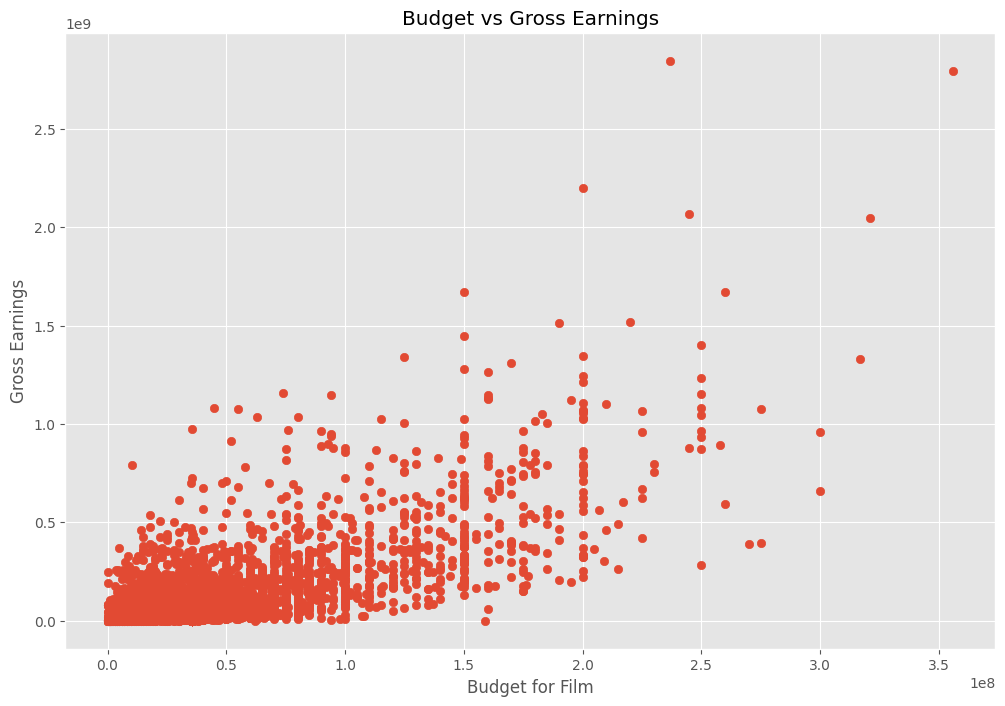

In [31]:
# Hypothesis
# (1)-the Budget and gross will have high corellation
# becuase we think that the best movies had to spent more money

# Scatterplot Budget vs gross
plt.scatter(x=movie_data['budget'],y=movie_data['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')
plt.show()


<Axes: xlabel='budget', ylabel='gross'>

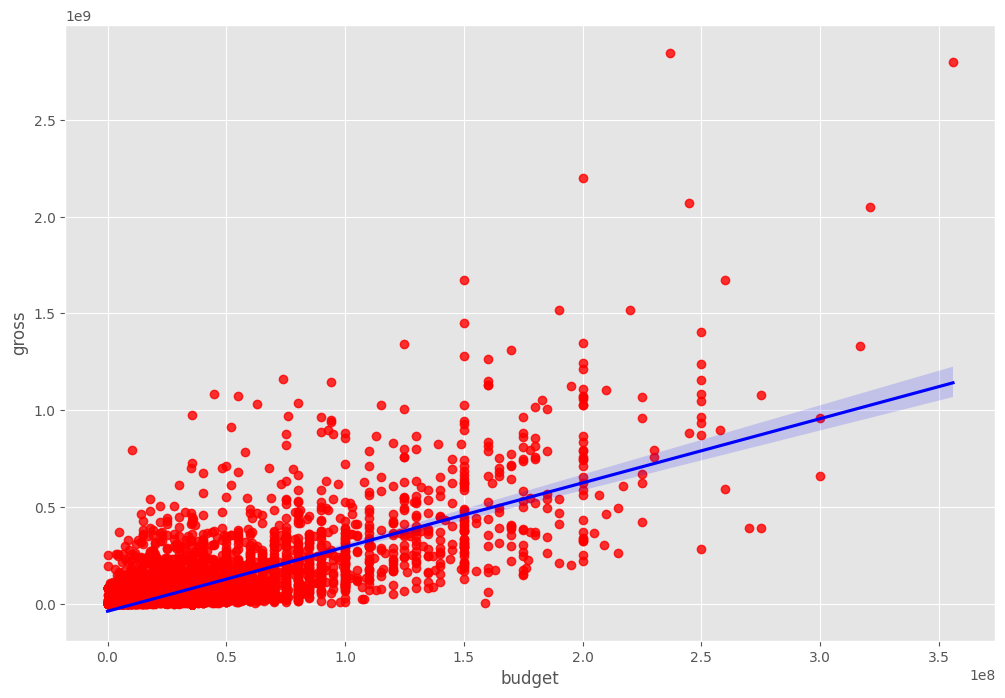

In [34]:
sns.regplot(x='budget',y='gross',data=movie_data,scatter_kws={'color':'red'},line_kws={'color':'blue'})

**<font color=green> Let's start looking at Correlation</font>**


In [37]:
movie_data.select_dtypes(include='number').corr()

,score,votes,budget,gross,runtime,released_year
score,1.000000,0.409182,0.064554,0.182868,0.399451,0.108188
votes,0.409182,1.000000,0.421090,0.628713,0.309212,0.216092
budget,0.064554,0.421090,1.000000,0.711270,0.265305,0.259571
gross,0.182868,0.628713,0.711270,1.000000,0.241336,0.244169
runtime,0.399451,0.309212,0.265305,0.241336,1.000000,0.120084
released_year,0.108188,0.216092,0.259571,0.244169,0.120084,1.000000


<font color=green> There are different type of correlations  
**<font color=gray>pearson , kendall , spearman</font>**</font>

In [38]:
# By defualt its pearson
movie_data.select_dtypes(include='number').corr(method='pearson')

,score,votes,budget,gross,runtime,released_year
score,1.000000,0.409182,0.064554,0.182868,0.399451,0.108188
votes,0.409182,1.000000,0.421090,0.628713,0.309212,0.216092
budget,0.064554,0.421090,1.000000,0.711270,0.265305,0.259571
gross,0.182868,0.628713,0.711270,1.000000,0.241336,0.244169
runtime,0.399451,0.309212,0.265305,0.241336,1.000000,0.120084
released_year,0.108188,0.216092,0.259571,0.244169,0.120084,1.000000


In [39]:
movie_data.select_dtypes(include='number').corr(method='kendall')

,score,votes,budget,gross,runtime,released_year
score,1.000000,0.300115,0.003530,0.080368,0.283611,0.075118
votes,0.300115,1.000000,0.161853,0.507896,0.198240,0.321740
budget,0.003530,0.161853,1.000000,0.258476,0.161757,0.142068
gross,0.080368,0.507896,0.258476,1.000000,0.156061,0.171473
runtime,0.283611,0.198240,0.161757,0.156061,1.000000,0.097058
released_year,0.075118,0.321740,0.142068,0.171473,0.097058,1.000000


In [40]:
movie_data.select_dtypes(include='number').corr(method='spearman')

,score,votes,budget,gross,runtime,released_year
score,1.000000,0.428138,0.004735,0.118024,0.399857,0.110090
votes,0.428138,1.000000,0.235205,0.688537,0.290159,0.457313
budget,0.004735,0.235205,1.000000,0.361668,0.227921,0.199430
gross,0.118024,0.688537,0.361668,1.000000,0.227892,0.250949
runtime,0.399857,0.290159,0.227921,0.227892,1.000000,0.142993
released_year,0.110090,0.457313,0.199430,0.250949,0.142993,1.000000


In [41]:
movie_data.select_dtypes(include='number').corr(method='pearson')


,score,votes,budget,gross,runtime,released_year
score,1.000000,0.409182,0.064554,0.182868,0.399451,0.108188
votes,0.409182,1.000000,0.421090,0.628713,0.309212,0.216092
budget,0.064554,0.421090,1.000000,0.711270,0.265305,0.259571
gross,0.182868,0.628713,0.711270,1.000000,0.241336,0.244169
runtime,0.399451,0.309212,0.265305,0.241336,1.000000,0.120084
released_year,0.108188,0.216092,0.259571,0.244169,0.120084,1.000000


<font color=green>High correlation between Budget and Gross  
i was right.let's visualize this correlation matrix</font>

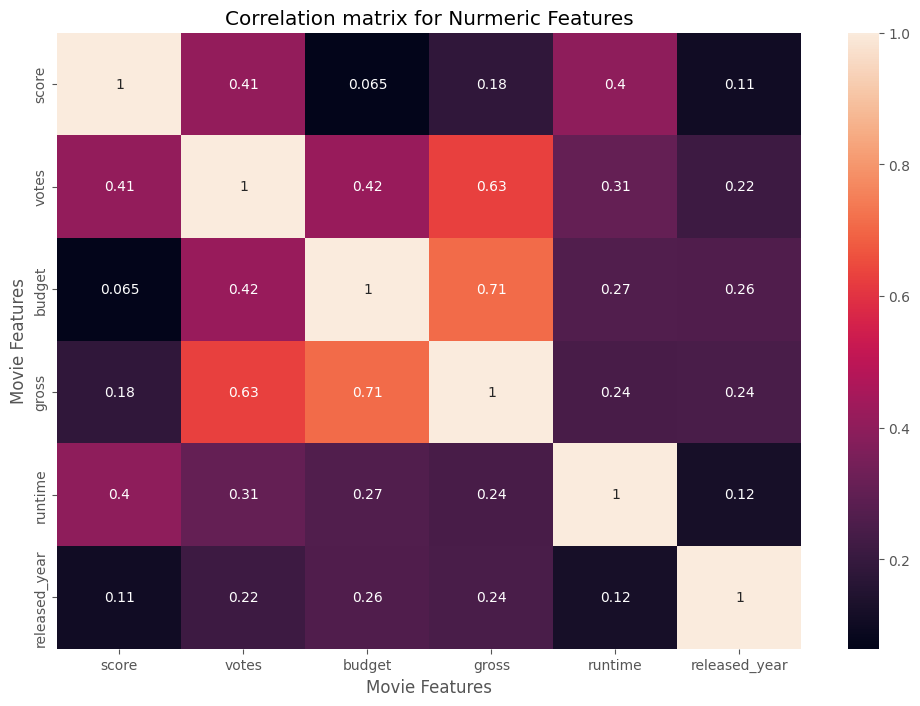

In [43]:
correlation_matrix = movie_data.select_dtypes(include='number').corr(method='pearson')
sns.heatmap(correlation_matrix,annot=True)

plt.title('Correlation matrix for Nurmeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [ ]:
# looks at company
# company is not nurmerical,but we can convert to nurmerical representation
# we can assign numbers for the companies.An unique number for each company




In [58]:
movie_data_numarized = movie_data.copy()

for col_name in movie_data_numarized.columns:
    if (movie_data_numarized[col_name].dtype == 'object'):
        movie_data_numarized[col_name] = movie_data_numarized[col_name].astype('category')
        movie_data_numarized[col_name] = movie_data_numarized[col_name].cat.codes

    
movie_data_numarized.head(5)    

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,match,clean_released_date,released_year
5445,533,5,0,2009-01-01,696,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0,2413,False,2009-12-18,2009.0
7445,535,5,0,2019-01-01,183,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0,2135,False,2019-04-26,2019.0
3045,6896,5,6,1997-01-01,704,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0,2426,False,1997-12-19,1997.0
6663,5144,5,0,2015-01-01,698,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0,2417,False,2015-12-18,2015.0
7244,536,5,0,2018-01-01,192,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0,2144,False,2018-04-27,2018.0


**<font color=green>Now we can see correlation of the all</font>**

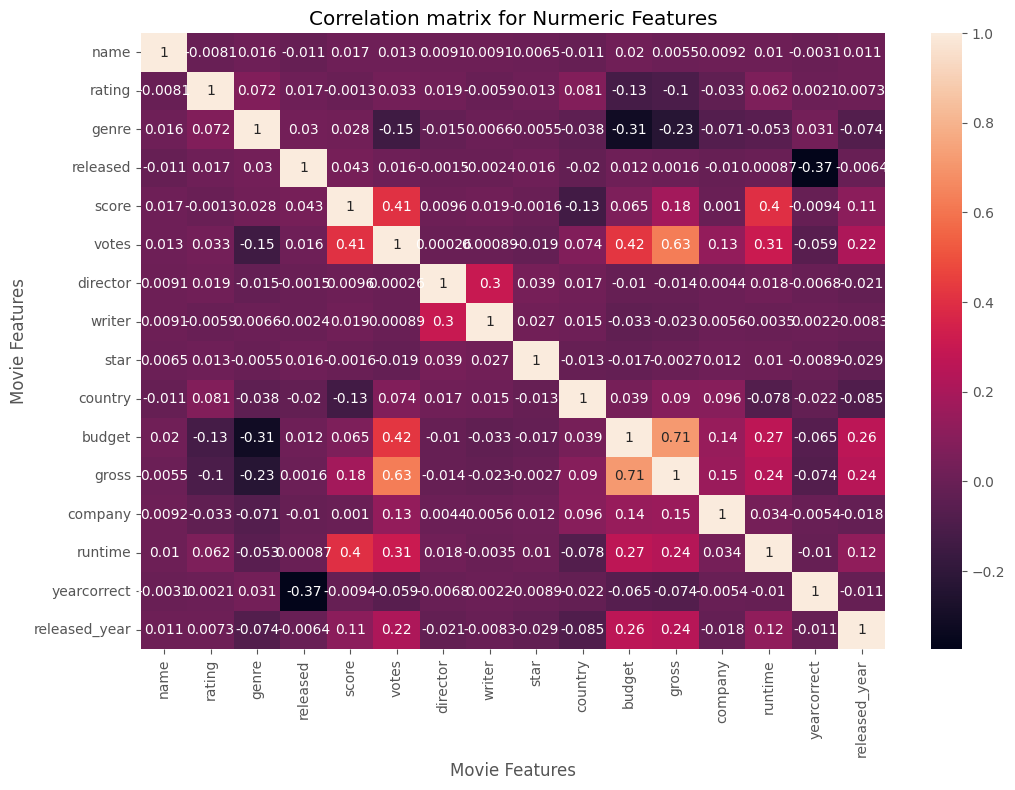

In [60]:
correlation_matrix = movie_data_numarized.select_dtypes(include='number').corr(method='pearson')
sns.heatmap(correlation_matrix,annot=True)

plt.title('Correlation matrix for Nurmeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [61]:
movie_data_numarized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,match,clean_released_date,released_year
name,1.000000,-0.008069,0.016355,0.011452,-0.011311,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.020368,0.005466,0.009211,0.010392,-0.003138,NaN,-0.004951,0.011431
rating,-0.008069,1.000000,0.072423,0.008781,0.016613,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.126046,-0.102116,-0.032943,0.062145,0.002138,NaN,-0.010258,0.007273
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.310566,-0.230267,-0.071067,-0.052711,0.030702,NaN,-0.080051,-0.073969
year,0.011452,0.008781,-0.081261,1.000000,-0.000695,0.097995,0.222945,-0.020794,-0.008655,-0.027242,-0.070937,0.265578,0.252042,-0.010431,0.120810,-0.006216,NaN,0.438381,0.997596
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.042788,0.016097,-0.001478,-0.002404,0.015777,-0.020427,0.012263,0.001636,-0.010474,0.000868,-0.374470,NaN,0.026193,-0.006376
score,0.017097,-0.001314,0.027965,0.097995,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.064554,0.182868,0.001030,0.399451,-0.009377,NaN,0.035082,0.108188
votes,0.013088,0.033225,-0.145307,0.222945,0.016097,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.421090,0.628713,0.133204,0.309212,-0.059004,NaN,0.118998,0.216092
director,0.009079,0.019483,-0.015258,-0.020794,-0.001478,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,-0.010364,-0.014272,0.004404,0.017624,-0.006819,NaN,0.003426,-0.021035
writer,0.009081,-0.005921,0.006567,-0.008655,-0.002404,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.033216,-0.023210,0.005646,-0.003511,0.002224,NaN,0.008115,-0.008312
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.016628,-0.002682,0.012442,0.010174,-0.008872,NaN,0.006276,-0.028796


In [76]:
correlation_mat = movie_data_numarized.corr()
correlation_pairs = correlation_mat.unstack()
correlation_pairs

name                 name                   1.000000
                     rating                -0.008069
                     genre                  0.016355
                     year                   0.011452
                     released              -0.011311
                     score                  0.017097
                     votes                  0.013088
                     director               0.009079
                     writer                 0.009081
                     star                   0.006472
                     country               -0.010737
                     budget                 0.020368
                     gross                  0.005466
                     company                0.009211
                     runtime                0.010392
                     yearcorrect           -0.003138
                     match                       NaN
                     clean_released_date   -0.004951
                     released_year          0.

In [77]:
sorted_corr_pairs = correlation_pairs.sort_values()
sorted_corr_pairs

released             yearcorrect           -0.374470
yearcorrect          released              -0.374470
genre                budget                -0.310566
budget               genre                 -0.310566
gross                genre                 -0.230267
genre                gross                 -0.230267
                     votes                 -0.145307
votes                genre                 -0.145307
score                country               -0.133348
country              score                 -0.133348
budget               rating                -0.126046
rating               budget                -0.126046
gross                rating                -0.102116
rating               gross                 -0.102116
country              released_year         -0.084657
released_year        country               -0.084657
year                 genre                 -0.081261
genre                year                  -0.081261
clean_released_date  genre                 -0.

In [74]:
higher_corr = sorted_corr_pairs[(sorted_corr_pairs > 0.5)]
higher_corr

votes                gross                  0.628713
gross                votes                  0.628713
budget               gross                  0.711270
gross                budget                 0.711270
released_year        year                   0.997596
year                 released_year          0.997596
released_year        clean_released_date    0.999668
clean_released_date  released_year          0.999668
                     clean_released_date    1.000000
budget               budget                 1.000000
gross                gross                  1.000000
company              company                1.000000
writer               writer                 1.000000
director             director               1.000000
country              country                1.000000
rating               rating                 1.000000
star                 star                   1.000000
votes                votes                  1.000000
runtime              runtime                1.

**<font color=blue>Votes and Budget have the highest correlation to the Gross Earnings  
Company has Low correlation</font>**